## 과적합 Overfitting

학습한 결과가 학습데이터에는 매우 잘 맞지만, 학습 데이터에만 너무 꼭 맞춰져 있어서 그 외의 데이터에는 잘 맞지 않는 상황

## 드롭아웃 Dropout

학습 시 전체 신경망 중 일부만을 사용하도록 하는 것. 즉 학습 단계마다 일부 뉴런을 제거(사용하지 않도록)함으로써, 일부 특징이 특정 뉴런들에 고정되는 것을 막아 가중치의 균형을 잡도록 하여 과적합을 방지한다. 

다만, 학습 시 일부 뉴런을 학습시키지 않기 때문에 충분하게 신경망이 학습될 때까지 시간이 좀 오래걸린다. (이말은 epoch을 좀더 늘려야할 수 도 있다는 것)

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
opt = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

### `tf.nn.dropout(L1, keep_prob)` 

이렇게 계층(Layer) 구성 마지막에 tf.nn.dropout 함수를 사용하면 드랍아웃이 적용된다. 첫번째 파라미터는 텐서가 들어가도 두번째 파라미터는 사용할 뉴런의 비율이 들어간다. 주의해야할 것은 학습이 끝난 뒤 예측시에는 신경망 전체를 사용하도록 해줘야한다는 것. 그래서 keep_prob 라는 placeholder를 만들어 학습 시에는 0.8을 넣고 예측 시에는 1을 넣어 신경망 전체를 사용하도록 한다.


In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

print('batch size : %s' % batch_size)
print('total batch size : %s' % total_batch)

for epoch in range(45):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([opt, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
        
    print('Epoch: %04d' % (epoch + 1), 'Avg. cost = {:.3f}'.format(total_cost/total_batch))

print('Complete!')

batch size : 100
total batch size : 550
Epoch: 0001 Avg. cost = 0.345
Epoch: 0002 Avg. cost = 0.244
Epoch: 0003 Avg. cost = 0.228
Epoch: 0004 Avg. cost = 0.210
Epoch: 0005 Avg. cost = 0.214
Epoch: 0006 Avg. cost = 0.203
Epoch: 0007 Avg. cost = 0.189
Epoch: 0008 Avg. cost = 0.195
Epoch: 0009 Avg. cost = 0.182
Epoch: 0010 Avg. cost = 0.185
Epoch: 0011 Avg. cost = 0.173
Epoch: 0012 Avg. cost = 0.165
Epoch: 0013 Avg. cost = 0.166
Epoch: 0014 Avg. cost = 0.166
Epoch: 0015 Avg. cost = 0.168
Epoch: 0016 Avg. cost = 0.157
Epoch: 0017 Avg. cost = 0.165
Epoch: 0018 Avg. cost = 0.155
Epoch: 0019 Avg. cost = 0.157
Epoch: 0020 Avg. cost = 0.150
Epoch: 0021 Avg. cost = 0.163
Epoch: 0022 Avg. cost = 0.173
Epoch: 0023 Avg. cost = 0.154
Epoch: 0024 Avg. cost = 0.158
Epoch: 0025 Avg. cost = 0.154
Epoch: 0026 Avg. cost = 0.154
Epoch: 0027 Avg. cost = 0.143
Epoch: 0028 Avg. cost = 0.145
Epoch: 0029 Avg. cost = 0.148
Epoch: 0030 Avg. cost = 0.143
Epoch: 0031 Avg. cost = 0.150
Epoch: 0032 Avg. cost = 0.142


In [12]:
is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy : %s' % sess.run(accuracy, 
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Accuracy : 0.9706


# 특이사항

- epoch을 15로 했을 때도 정확도가 dropout을 적용하기 전보다 낮았다.
- epoch을 30으로 했을 때도 정확도가 dropout 적용 전보다 낮았다.
- epoch을 45으로 했을 때도 정확도가 dropout 적용 전보다 낮았다.




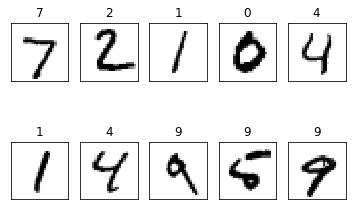

In [16]:
import matplotlib.pyplot as plt

labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})
fig = plt.figure()

for i in range(10):
    subplot = fig.add_subplot(2,5, i+1)
    
    # x. y 축 눈금 삭제
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('%d' % np.argmax(labels[i]))
    
    # 1차원 배열의 값을 28x28 형식의 2차원 배열로 변경
    # cmap 파라미터를 통해 이미지를 그레이 스케일로 출력
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r )
plt.show()